# Notebook to explore TangoSIDM hdf5 files

In [1]:
import h5py
import matplotlib.pyplot as plt

plt.style.use('pltstyle.mplstyle')

In [2]:
DATA_PATH = "../data/TangoSIDM/"

IDs = {
    "SigmaConstant00": "CDM",
    "SigmaConstant01": "SigmaConstant01",
    "SigmaConstant10": "SigmaConstant10",
    "SigmaVelDep20Anisotropic": "SigmaVel20",
    "SigmaVelDep60Anisotropic": "SigmaVel60", 
    "SigmaVelDep100Anisotropic": "SigmaVel100",
}

Let's explore the structure of `SigmaConstant00.hdf5` file, the others are equivalent.

## Halos
Each file is a collection of hdf5 groups named with the `ID` of the halo in the snapshot at redshift 0 in the TangoSIDM box. As we will see below, each hdf5 group for each halo contains sub-groups and datasets with relevent data.

In [3]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    print(file.keys())

<KeysViewHDF5 ['15', '20', '25', '257910', '257913', '257914', '257915', '257916', '257917', '257918', '257919', '257920', '257921', '257922', '257923', '257924', '257925', '257926', '257927', '257928', '257929', '258798', '258799', '26', '261744', '261745', '261746', '261747', '261748', '261749', '261750', '261751', '261752', '261753', '261755', '261756', '261757', '261758', '261761', '261762', '261763', '261764', '261765', '262450', '264720', '264721', '264722', '264723', '264724', '264725', '264726', '264727', '264728', '264729', '264730', '264731', '264732', '264733', '264735', '264736', '264737', '264738', '265280', '265281', '265282', '265284', '265285', '265286', '265287', '265288', '265289', '265290', '265291', '265292', '265293', '265294', '265295', '265296', '265297', '265299', '265300', '265751', '265752', '265753', '265754', '265755', '265756', '265757', '265758', '265759', '265760', '265761', '265762', '265763', '265764', '265765', '265766', '265767', '265768', '265769', '

### Main halo or satellite?
Each halo has an attribute that indicates whether the halo is a host halo (`main_halo_of`) or a satellite halo (`subhalo_of`). In the first case, a list of the parent halo's satellites is returned as value of the attribute, whereas in the second the ID of the parent halo is returned.

In [4]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    
    # Check host halo 20
    for k, v in file['20'].attrs.items():
        print(k, v)
    
    print()
    # Check satellite halo 261763
    for k, v in file['261763'].attrs.items():
        print(k, v)

main_halo_of [262450 261744 261745 261746 261747 261748 261749 261750 261751 261753
 261752 261756 261757 261758 261755 261761 261763 261762 261765 261764]

subhalo_of 20


## What type of data?

The hdf5 group for each halo has two subgroups that we will explore next. The subgroups are
- `halo_data`: data at redshift 0 (e.g. density profile, circular velocity profile, ...)
- `tree_data`: data collected following the halo through the simulation snapshots (e.g. progenitor index, pericenter, ...)

In [5]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
        print(file['20'].keys())

<KeysViewHDF5 ['halo_data', 'tree_data']>


### `tree_data`

The `tree_data` groups contains 8/11 datasets for host/satellite halos.

The 8 main datasets are:
- `redshift`: a np.array of redshift bins of the cosmological simulations snapshots.
- `CoP`: a np.array of the center of mass of the halo in units of Mpc corresponding to each redshift snapshots.
- `M200c`: a np.array of the virial mass of the halo in units of solar masses corresponding to each redshift snapshots.
- `R200c`: a np.array of the virial radius of the halo in units of kpc corresponding to each redshift snapshots.
- `Vmax`: a np.array of the maximum circular velocity of halo in units of km/s corresponding to each redshift snapshots.
- `bound_dm_mass`: a np.array of the mass of the dark matter particles bounded to the halo in units of solar masses corresponding to each redshift snapshots.
- `progenitor_idx`: a np.array of idx of the halo in the previous snapshot corresponding to each redshift snapshots.
- `subtype`: a np.array of the flag indicating if the halo is a field halo or a satellite halo corresponding to each redshift snapshots.

The 3 datasets only for satellite halos contains information that can be retrieved from the other data, but were saved separately because useful during the analysis. These 2 datasets are:
- `accretion`: a 2d np.array where the first item corresponds to the index of the redshift bin in the `redshift` array, and the second item corresponds to the redshift bin value when the halo was accreted. Accretion is defined based on when the flag `subtype` indicate the halo is a field halo (=10) or a satellite halo (>10).
- `pericenter`: a 2d np.array where the first item corresponds to the redshift when the satellite halo is closest to its host, and the second item corresponds to the value of the pericenter distance in kpc.
- `Rmax`: a scalar of the radius of the maximum circular velocity of halo in units of kpcs corresponding to z=0 only.

**NOTE**: see notebook `2 - orbits.ipynb` to learn how to plot satellite halos orbits around host halos.

In [6]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    # Tree data for host halo
    print(file['20']['tree_data'].keys())
    # Tree data for satellite halo
    print(file['261763']['tree_data'].keys())

<KeysViewHDF5 ['CoP', 'M200c', 'R200c', 'Vmax', 'bound_mass_dm', 'progenitor_idx', 'redshift', 'subtype']>
<KeysViewHDF5 ['CoP', 'M200c', 'R200c', 'Rmax', 'Vmax', 'accretion', 'bound_mass_dm', 'pericenter', 'progenitor_idx', 'redshift', 'subtype']>


Let's plot the evolution of a halo through redshift bins.

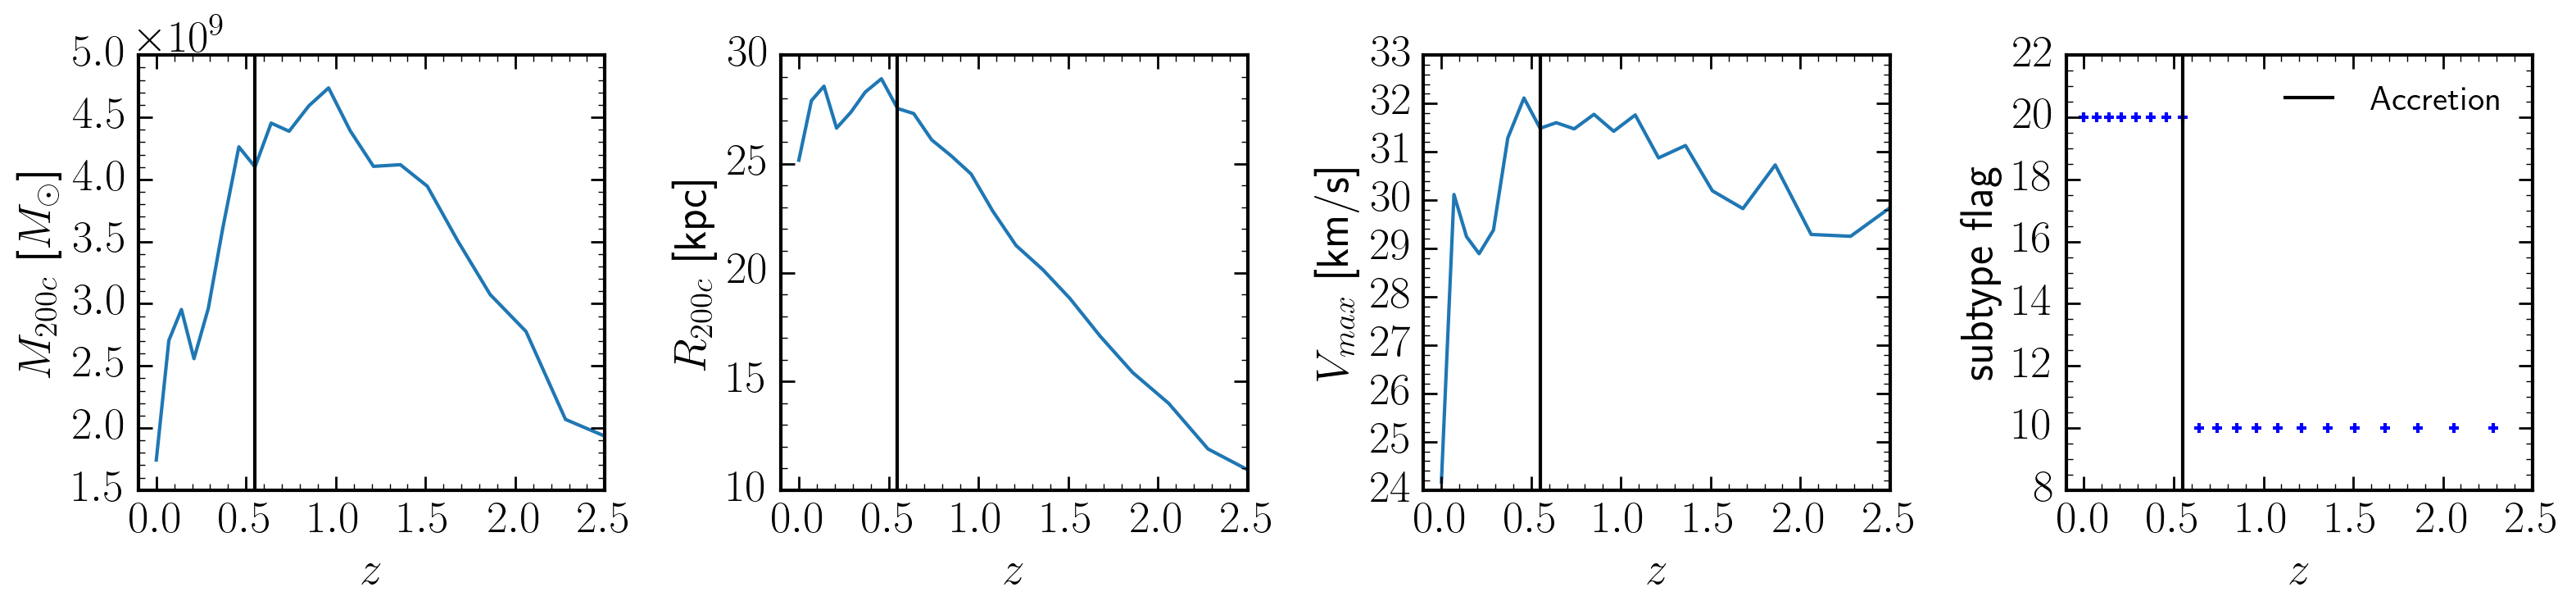

In [7]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    
    fig, axs = plt.subplots(1, 4, figsize=(16, 4), facecolor='w', sharex=True, dpi=200)
    tree_data = file['261763']['tree_data']
    axs[0].plot(tree_data['redshift'][:], tree_data['M200c'][:])
    axs[0].set_ylabel(r"$M_{200c}$ [$M_\odot$]")
    axs[1].plot(tree_data['redshift'][:], tree_data['R200c'][:])
    axs[1].set_ylabel(r"$R_{200c}$ [kpc]")
    axs[2].plot(tree_data['redshift'][:], tree_data['Vmax'][:])
    axs[2].set_ylabel(r"$V_{max}$ [km/s]")
    axs[3].scatter(tree_data['redshift'][:], tree_data['subtype'][:])
    axs[3].set_ylabel(r"subtype flag")
    for ax in axs:
        ax.set_xlim(-0.1, 2.5)
        ax.set_xlabel("$z$")
        ax.axvline(tree_data['accretion'][1], label="Accretion") 
    axs[3].legend(fontsize=15)
    plt.tight_layout()

### `halo_data`

The `halo_data` groups contains 5/13 datasets for host/satellite halos. All data is for redshift 0.

The 5 main datasets are:
- `centered_radial_bins`: a np.array of radial bins in units of kpc.
- `centered_rotation_radial_bins`: a np.array of radial bins in units of kpc.
- `dm_density`: a np.array of the density of the halo in units of solar masses per kpc^3 computed at `centered_radial_bins`.
- `dm_velocity`: a np.array of the dark matter velocity in units of km/s computed at `centered_radial_bins`.
- `dm_rotation`: a np.array of the circular velocity of the halo in units of km/s computed at `centered_rotation_radial_bins`.

The 8 datasets only for satellite halos contains information that can be retrieved from the other data, but were saved separately because useful during the analysis. The 8 datasets only for satellite halos are:
- `radius_density`: 1 kpc.
- `density_at_radius`: the density in units of solar masses per kpc^3 at 1 kpc (`radius_density`).
- `radius_rotation`: 2 kpc.
- `rotation_at_radius`: the circular velocity in units of km/s at 2 kpc (`rotation_at_radius`).
- `fiducial_radius_rotation`: fiducial radius in kpc units
- `rotation_at_fiducial_radius`: the circular velocity in units of km/s at the fiducial radius (`fiducial_radius_rotation`).
- `nfw_fit`: $[r_s, \rho_s]$ parameters of the NFW profile from MCMC fit.
- `iso_fit`: $[r_0, \rho_0]$ parameters of the isothermal profile from MCMC fit.
- `core_nfw_fit`: $[\log_{10}M_{200}, r_c, n]$ parameters of the core NFW profile from MCMC fit.

**NOTE**: see notebook `3 - density_fit.ipynb` to learn how to fit density profiles with NFW and isothermal profiles.

In [8]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    # Halo data for host halo   
    print(file['20']['halo_data'].keys())
    # Halo data for satellite halo
    print(file['261763']['halo_data'].keys())

<KeysViewHDF5 ['centered_radial_bins', 'centered_rotation_radial_bins', 'dm_density', 'dm_rotation', 'dm_velocity']>
<KeysViewHDF5 ['centered_radial_bins', 'centered_rotation_radial_bins', 'core_nfw_fit', 'density_at_radius', 'dm_density', 'dm_rotation', 'dm_velocity', 'fiducial_radius_rotation', 'iso_fit', 'nfw_fit', 'radius_density', 'radius_rotation', 'rotation_at_fiducial_radius', 'rotation_at_radius']>


Let's plot the structural properties of a halo at redshift 0.

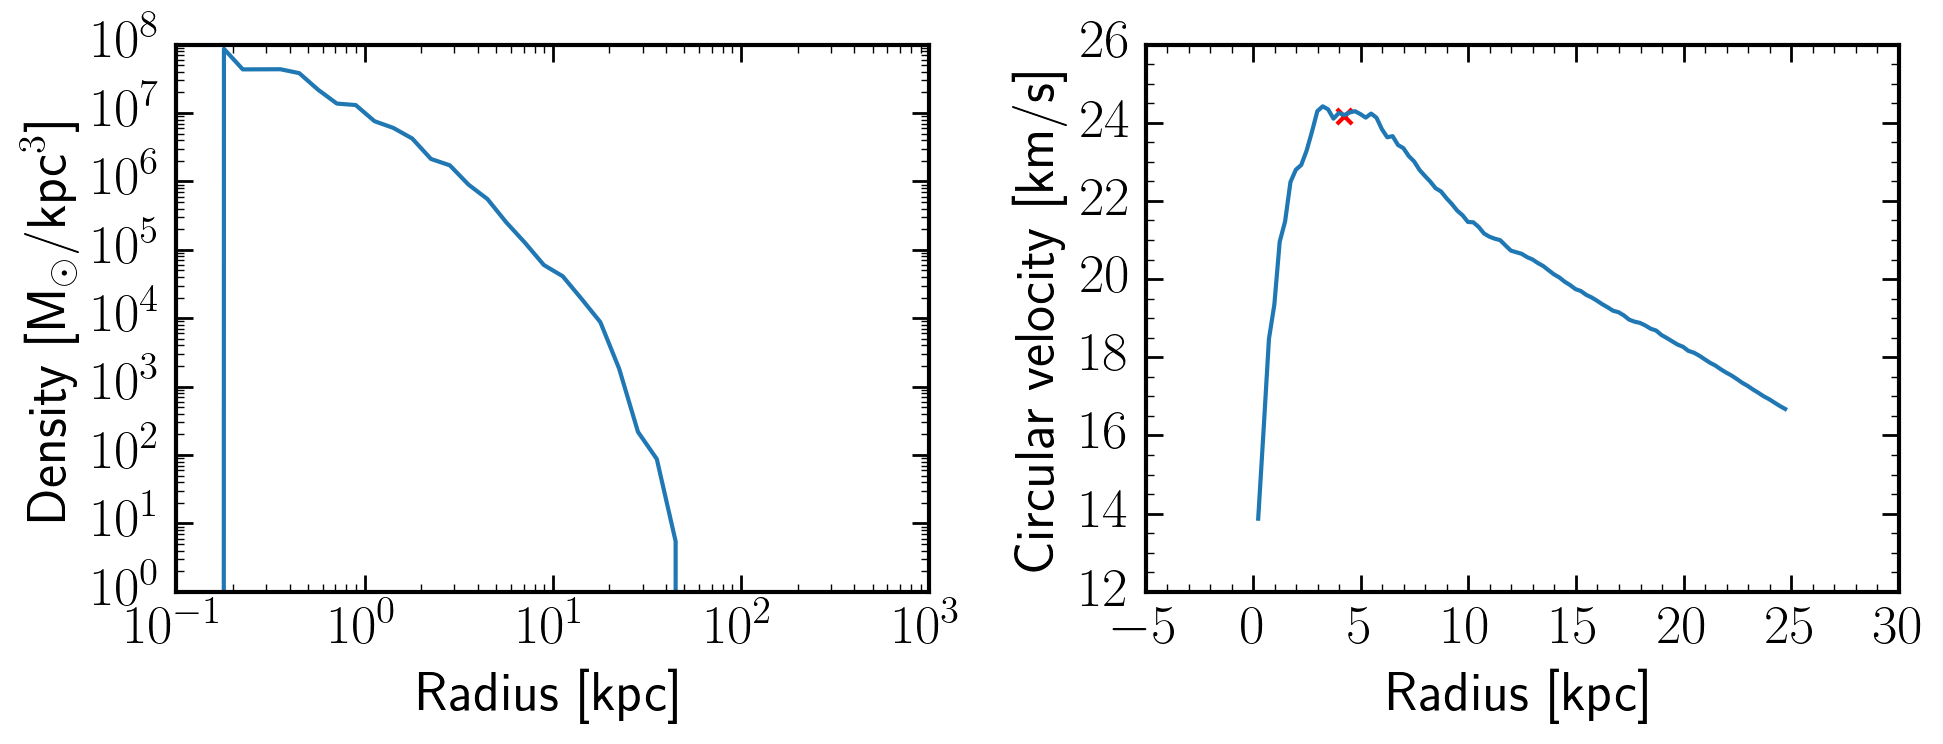

In [9]:
with h5py.File(DATA_PATH+f"SigmaConstant00.hdf5", "r") as file:
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', sharex=False, dpi=200)
    halo_data = file['261763']['halo_data']
    tree_data = file['261763']['tree_data']
    axs[0].plot(halo_data['centered_radial_bins'][:], halo_data['dm_density'][:])
    axs[0].set_ylabel(r"Density [M$_{\odot}$/kpc$^{3}$]")
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[1].plot(halo_data['centered_rotation_radial_bins'][:], halo_data['dm_rotation'][:])
    axs[1].scatter(tree_data['Rmax'][...], tree_data['Vmax'][0], marker='x', s=30, color='r', label="Vmax")
    axs[1].set_ylabel(r"Circular velocity [km/s]")
    for ax in axs:
        ax.set_xlabel("Radius [kpc]")
    plt.tight_layout()